## STAT207 Final Project - Video Game Rating Prediction Analysis
Ann Phan, Sabarish Mogallapalli, Jerry Zhong, Mohammed Raheem

In [438]:
#Imports here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import warnings
from sklearn.exceptions import ConvergenceWarning
# Ignore scikit-learn ConvergenceWarnings
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=UserWarning)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

## 1. Introduction

The motivation why someone would want to build a predictive model that predicts 'release rating' for new datasets. This model would be especially useful for game developers to determine whether their game will get the rating they need to succeed. The 'max players' column will help them know the target audience. The 'review score' column will inform them of the game's quality and content. The 'sales' will show the popularity and appeal of the game. The 'used price' shows the longevity and replyability of the game. The 'release console'  will inform them of how different platforms cater to different audiences who each have their own rating standards. Finally the model will predict the 'release rating' (Everyone, Mature, Teen) for the game. They would prefer equally high accuracy in predicting both "positives" and "negatives" as a classifier. Because release rating is crucial to defining the success of a game, whether a game gets an appropriate rating is significant for marketing, audience targeting, and regulatory compliance. False positives (misclassifying a game as a different rating than it actually receives) and false negatives (misclassifying a game as the same rating when it's different) both have potential consequences since a false positive could lead to misinformed marketing strategies, and a false negative could result in developers being unprepared for regulatory or audience restrictions. Similar work was done where the "work provides a method to predict the G-Score, that defines how good a video game is, from its trailer (video) and summary (text). " (Batchu et al.)

The primary research goal of our analysis is to build a predictive model that will effectively predict 'Release.Rating'. 'Release.Rating' is a  binary response variable with value 0 for 'everyone' and 1 for 'teen' and 'mature'.  We used 5 explanatory variables, 4 numerical and 1 categorical. The four numerical variables we used are 'max players', 'review score', 'sales', 'used price'. The one categorical variable we used was 'release console'. Our second research goal we are analyzing is creating a model that will yield reliable interpretative insights about the nature between the variables in the dataset. Our third research goal is to thoroughly describe the nature of the variables and relationship between the variables.


## 2. Dataset Discussion

We got this csv file (dataset) from researchportal.port.ac.uk/

The creator Cox, J research from University of Portsmouth, in May 21, 2015. 
Cox, Joe. / What makes a blockbuster video game? an empirical analysis of US sales data. In: Managerial & Decision Economics. 2014 ; Vol. 35, No. 3. pp. 189-198.

Originally collected by Dr. Joe Cox, this dataset has information about the sales and playtime of over a thousand video games released between 2004 and 2010. 

In [563]:
df = pd.read_csv('video_games.csv')
df.head()

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [440]:
print(f'Rows: ',df.shape[0])

Rows:  1212


There are 1212 observations in this dataset. This dataset was collected by Dr. Joe Cox. The playtime information was collected from crowd-sourced data on “How Long to Beat”.

This dataset is NOT inclusive of ALL possible types of observations that could have been considered in this dataset. There are still endless 
video games that could be still be included.

Our question above can help game developers gain insights, and they may see the value in ongoing analysis and refinement of their games based on evolving player preferences and industry trends. Understanding the relationships between variables could also impact how games are communicated and marketed. Publishers may tailor their promotional efforts to highlight the features that are statistically correlated with higher ratings. Furthermore, game publishers and creators can gain a competitive advantage by staying ahead of market trends and delivering products that align closely with player expectations.

We chose Features.Max Players, Metrics.Review Score, Metrics.Sales, Metrics.Used Price, Release.Console as the independent variables and Release.Rating as the dependent variable. The reason why we chose these explanatory variables is because they are a mix of categorical and numeric variables (mainly numeric) where the analysis can be straightforward as the name of these variables already explained exactly what they mean. Furthermore, the other variables seem more confusing and we were unsure as to their meaning/contribution. We chose Release.Rating because we feel like this would align with our research goal was to understand what makes a game rated higher than others as it would also impact the sales/reputation of the game

## 3. Dataset Cleaning

In [441]:
df_copy = df.copy()
df_copy

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Secret Files: Tunguska,True,1,True,True,Adventure,True,NaN,True,71,...,11.500000,11.750000,11.500000,2,11.250000,8.800000,12.566667,8.716667,16,6.816667
1208,Fading Shadows,True,1,True,True,"Action,Adventure",True,NaN,True,62,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
1209,Hail to the Chimp,True,1,True,True,"Action,Strategy",True,NaN,True,51,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
1210,Secret Files: Tunguska,True,2,True,True,Adventure,True,NaN,True,64,...,11.500000,11.750000,11.500000,2,11.250000,8.800000,12.566667,8.716667,16,6.816667


In [442]:
df_copy = df_copy[['Features.Max Players','Metrics.Review Score','Metrics.Sales','Metrics.Used Price','Release.Console','Release.Rating']]
df_copy

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating
0,1,85,4.69,24.95,Nintendo DS,E
1,1,89,0.56,14.95,Sony PSP,E
2,2,81,0.54,22.95,Nintendo DS,E
3,1,81,0.49,12.95,Sony PSP,E
4,1,61,0.45,14.95,Nintendo DS,E
...,...,...,...,...,...,...
1207,1,71,0.03,17.95,Nintendo DS,M
1208,1,62,0.03,17.95,Sony PSP,E
1209,1,51,0.03,15.95,PlayStation 3,M
1210,2,64,0.02,17.95,Nintendo Wii,M


In [443]:
df_copy = df_copy.assign(y=df_copy['Release.Rating'].replace({'E': 1, 'M': 0, 'T': 0}))
df_copy

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Console,Release.Rating,y
0,1,85,4.69,24.95,Nintendo DS,E,1
1,1,89,0.56,14.95,Sony PSP,E,1
2,2,81,0.54,22.95,Nintendo DS,E,1
3,1,81,0.49,12.95,Sony PSP,E,1
4,1,61,0.45,14.95,Nintendo DS,E,1
...,...,...,...,...,...,...,...
1207,1,71,0.03,17.95,Nintendo DS,M,0
1208,1,62,0.03,17.95,Sony PSP,E,1
1209,1,51,0.03,15.95,PlayStation 3,M,0
1210,2,64,0.02,17.95,Nintendo Wii,M,0


In [444]:
df_copy = df_copy.rename(columns={'Features.MaxPlayers':'Features_Max_Players','Metrics.Review_Score':'Metrics_Review_Score','Metrics.Used_Price':'Metrics_Used_Price','Release.Console':'Release_Console','Release.Rating':'Release_Rating',"Metrics.Sales":"Metrics_Sales"})
df_copy

,Features.Max Players,Metrics.Review Score,Metrics_Sales,Metrics.Used Price,Release_Console,Release_Rating,y
0,1,85,4.69,24.95,Nintendo DS,E,1
1,1,89,0.56,14.95,Sony PSP,E,1
2,2,81,0.54,22.95,Nintendo DS,E,1
3,1,81,0.49,12.95,Sony PSP,E,1
4,1,61,0.45,14.95,Nintendo DS,E,1
...,...,...,...,...,...,...,...
1207,1,71,0.03,17.95,Nintendo DS,M,0
1208,1,62,0.03,17.95,Sony PSP,E,1
1209,1,51,0.03,15.95,PlayStation 3,M,0
1210,2,64,0.02,17.95,Nintendo Wii,M,0


In [445]:
df_copy.dtypes

Features.Max Players      int64
Metrics.Review Score      int64
Metrics_Sales           float64
Metrics.Used Price      float64
Release_Console          object
Release_Rating           object
y                         int64
dtype: object

In [446]:
df_copy.isna().sum()

Features.Max Players    0
Metrics.Review Score    0
Metrics_Sales           0
Metrics.Used Price      0
Release_Console         0
Release_Rating          0
y                       0
dtype: int64

In [447]:
df_copy = df_copy.dropna().reset_index(drop=True)
df_copy

,Features.Max Players,Metrics.Review Score,Metrics_Sales,Metrics.Used Price,Release_Console,Release_Rating,y
0,1,85,4.69,24.95,Nintendo DS,E,1
1,1,89,0.56,14.95,Sony PSP,E,1
2,2,81,0.54,22.95,Nintendo DS,E,1
3,1,81,0.49,12.95,Sony PSP,E,1
4,1,61,0.45,14.95,Nintendo DS,E,1
...,...,...,...,...,...,...,...
1207,1,71,0.03,17.95,Nintendo DS,M,0
1208,1,62,0.03,17.95,Sony PSP,E,1
1209,1,51,0.03,15.95,PlayStation 3,M,0
1210,2,64,0.02,17.95,Nintendo Wii,M,0


Missing Value Detection and Cleaning
The dataset does not have any IMPLICIT missing values. In machine learning models, NaN values can cause errors or lead to biased results. Removing them can help improve the performance of the model. However, dropping NaN values leads to a loss of information, and in some cases, the dropped rows or columns may contain valuable data that could have contributed to the analysis.

In [448]:
df_copy = df_copy[(df_copy['Release_Console'] == 'Nintendo Wii') | (df_copy['Release_Console'] == 'PlayStation 3') | (df_copy['Release_Console'] == 'X360')]
df_copy

,Features.Max Players,Metrics.Review Score,Metrics_Sales,Metrics.Used Price,Release_Console,Release_Rating,y
29,4,89,1.69,17.95,X360,E,1
36,2,83,0.95,17.95,X360,E,1
43,4,79,0.70,17.95,X360,E,1
47,2,74,0.62,4.95,X360,E,1
56,4,85,0.38,17.95,X360,E,1
...,...,...,...,...,...,...,...
1201,1,50,0.04,19.95,Nintendo Wii,T,0
1202,1,56,0.04,17.95,X360,T,0
1203,4,52,0.03,16.95,X360,M,0
1209,1,51,0.03,15.95,PlayStation 3,M,0


Here we decided to drop the data points that were not in the release_console XX360, Nintendo Wii or PlayStation 3 because only release_console was the categorical variable that we could drop observations that we believe had only a few observations where we can consider dropping all rows that correspond to these particular consoles as situations like this can lead to overfitting.

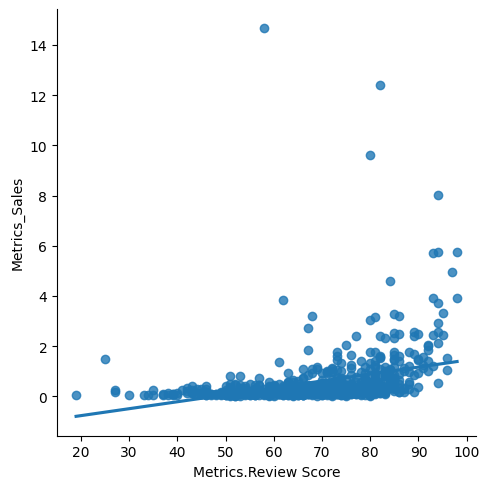

In [449]:
sns.lmplot(x='Metrics.Review Score',y='Metrics_Sales',ci=False,data=df_copy)
plt.show()

In [450]:
df_copy[['Metrics.Review Score','Metrics_Sales']].corr()

,Metrics.Review Score,Metrics_Sales
Metrics.Review Score,1.000000,0.332867
Metrics_Sales,0.332867,1.000000


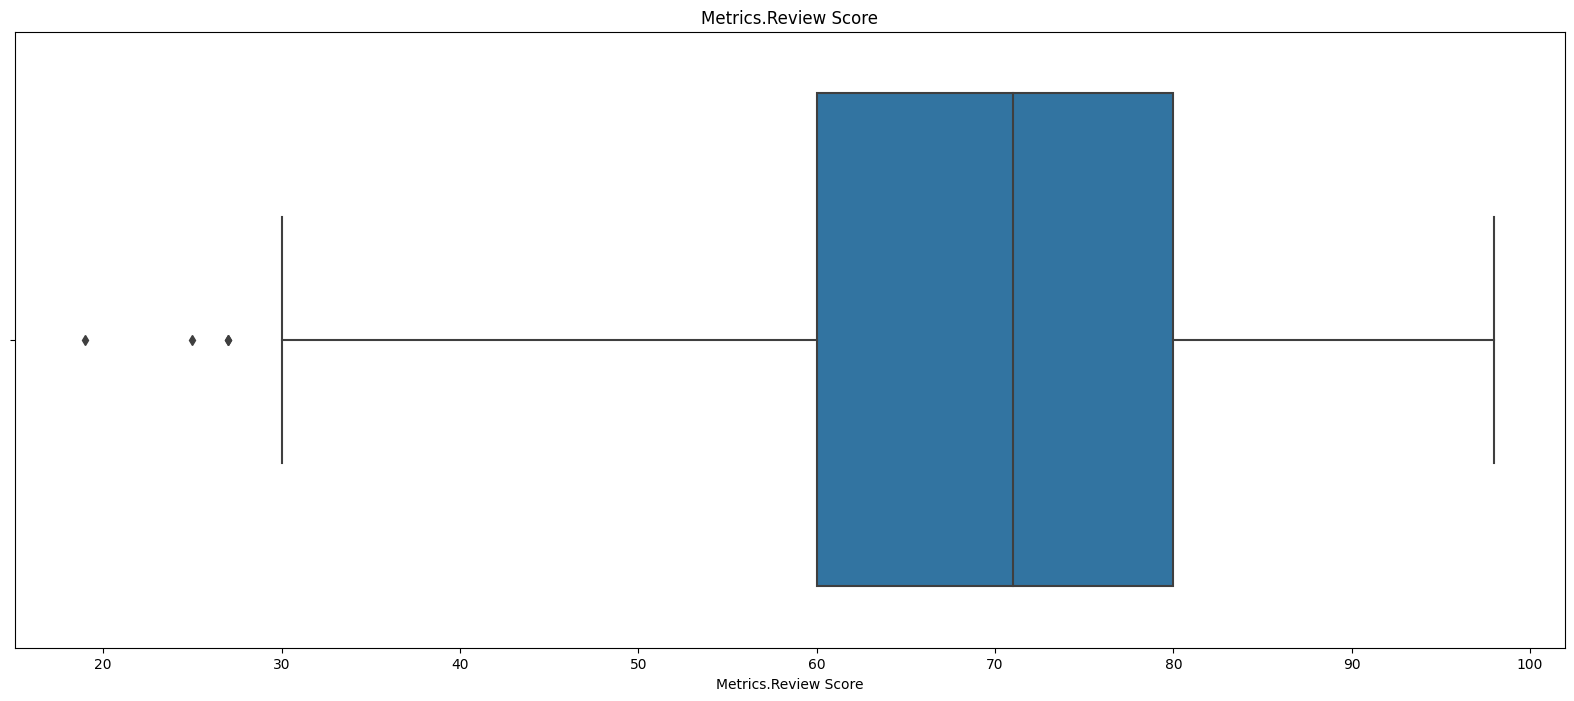

In [451]:
plt.figure(figsize=(20,8))
Score = df_copy['Metrics.Review Score'].value_counts()
sns.boxplot(x=df_copy['Metrics.Review Score'])
plt.title('Metrics.Review Score')
plt.show()

We detected outliers in these scatterplots and decided to drop the ones with metrics.review score <30.  We dropped 653-648 = 5 rows.


In [452]:
df_copy = df_copy[df_copy['Metrics.Review Score']>30]
df_copy

,Features.Max Players,Metrics.Review Score,Metrics_Sales,Metrics.Used Price,Release_Console,Release_Rating,y
29,4,89,1.69,17.95,X360,E,1
36,2,83,0.95,17.95,X360,E,1
43,4,79,0.70,17.95,X360,E,1
47,2,74,0.62,4.95,X360,E,1
56,4,85,0.38,17.95,X360,E,1
...,...,...,...,...,...,...,...
1201,1,50,0.04,19.95,Nintendo Wii,T,0
1202,1,56,0.04,17.95,X360,T,0
1203,4,52,0.03,16.95,X360,M,0
1209,1,51,0.03,15.95,PlayStation 3,M,0


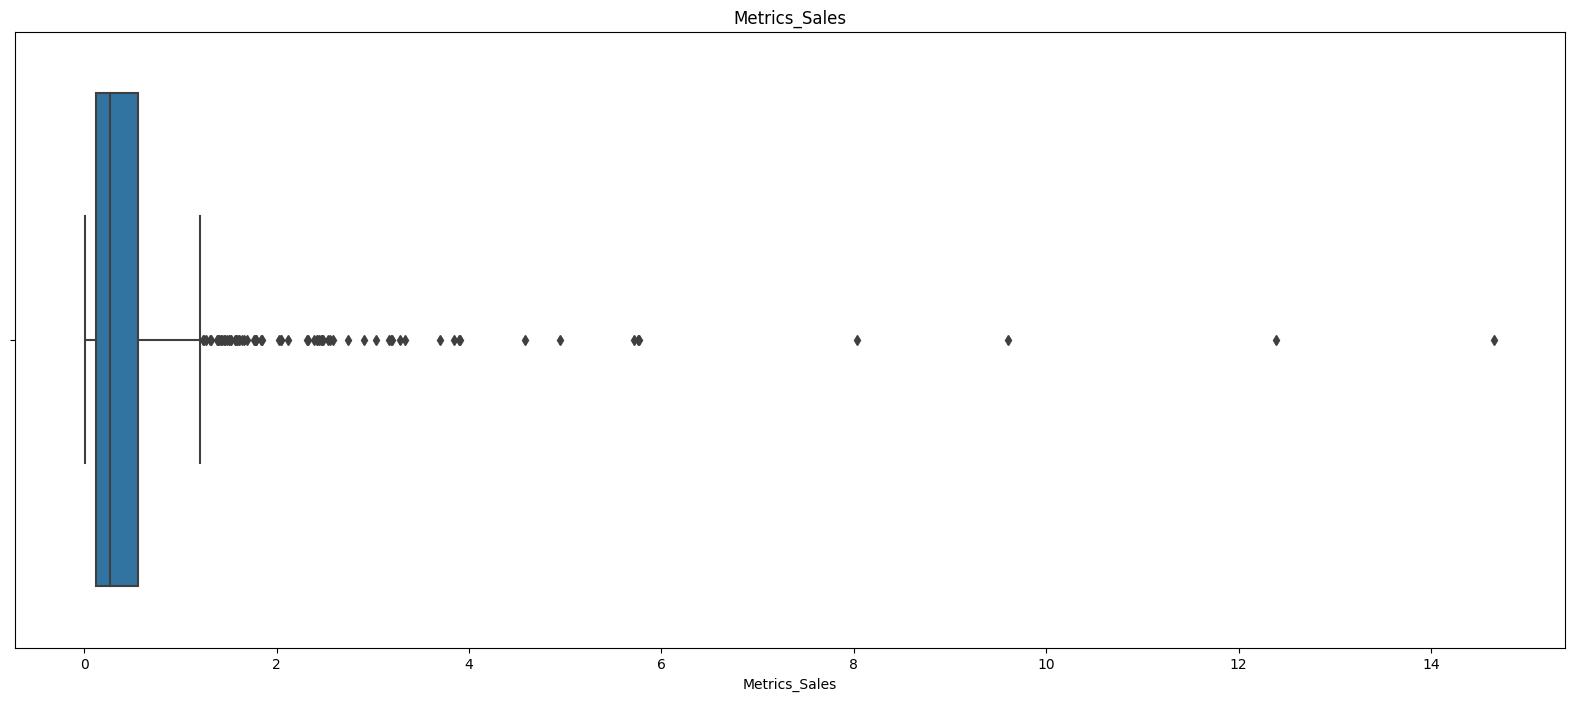

In [453]:
plt.figure(figsize=(20,8))
Score = df_copy['Metrics_Sales'].value_counts()
sns.boxplot(x=df_copy['Metrics_Sales'])
plt.title('Metrics_Sales')
plt.show()

Similarly, we dropped 648 - 552 = 96 rows of outliers here by removing all the data points with metrics_sales > 1

In [454]:
df_copy = df_copy[df_copy['Metrics_Sales']<1]
df_copy

,Features.Max Players,Metrics.Review Score,Metrics_Sales,Metrics.Used Price,Release_Console,Release_Rating,y
36,2,83,0.95,17.95,X360,E,1
43,4,79,0.70,17.95,X360,E,1
47,2,74,0.62,4.95,X360,E,1
56,4,85,0.38,17.95,X360,E,1
61,4,77,0.36,16.95,X360,E,1
...,...,...,...,...,...,...,...
1201,1,50,0.04,19.95,Nintendo Wii,T,0
1202,1,56,0.04,17.95,X360,T,0
1203,4,52,0.03,16.95,X360,M,0
1209,1,51,0.03,15.95,PlayStation 3,M,0


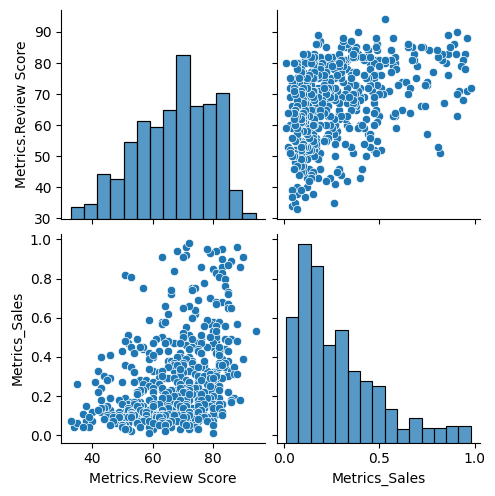

In [455]:
sns.pairplot(df_copy[['Metrics.Review Score','Metrics_Sales']])
plt.show()

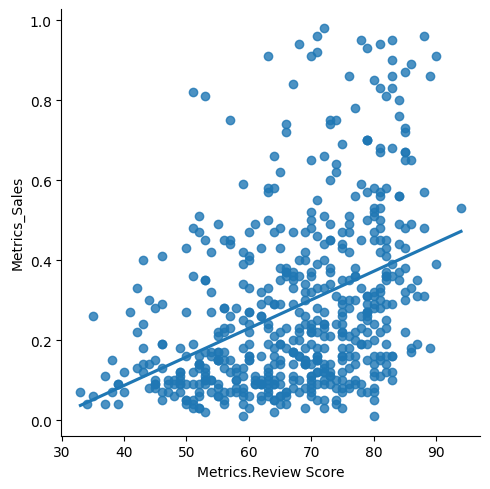

In [456]:
sns.lmplot(x='Metrics.Review Score',y='Metrics_Sales',ci=False, data=df_copy)
plt.show()

Sample size cleaning

In [457]:
df_copy['Release_Console'].value_counts()

X360             241
PlayStation 3    158
Nintendo Wii     153
Name: Release_Console, dtype: int64

In [458]:
df_copy['Release_Rating'].value_counts()

E    215
T    211
M    126
Name: Release_Rating, dtype: int64

In [459]:
y_counts = df_copy['y'].value_counts()
y_counts

0    337
1    215
Name: y, dtype: int64

After removing all the outliers we detected from the boxplots and removing the observations with different consoles other than Nintendo Wii, XBox 360 and Play Station 3, we have 552 data points left, which means we removed 660 observations in total.

The pros I believe are that we avoided the overfitting issue by dropping data points that we believe did not contribute meaningfully from the categorical variable release_console. However, the issue is that we dropped almost half of our observations from the selection of only keeping Nintendo Wii, XBox 360 and Play Station 3, and we are do not know for sure if these observations we dropped would have led to overfitting or that we might have missed meaningful datapoints. Furthermore, we believe that using boxplots only to detect outliers is not as accurate as using the IQR method or the Z score +-3 method as we do not know that every observation outside of the whisker plot were exactly an outlier.

## 4. Preliminary Analysis

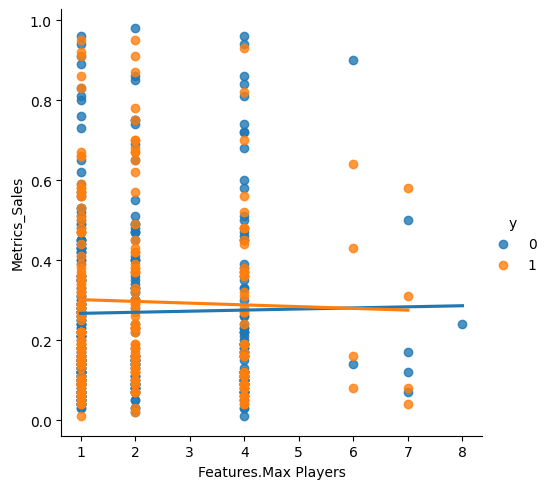

In [460]:
sns.lmplot(x='Features.Max Players', y='Metrics_Sales',hue='y',ci=False,data=df_copy)
plt.show()

From these graphs below, individually we think that Metrics Review Score and Metric Sales have a higher a stronger relationships with the response variable and a positive linear relationship which makes sense in the context of video games as well.

All of the other explanatory variables have weak relationships with the response variable.

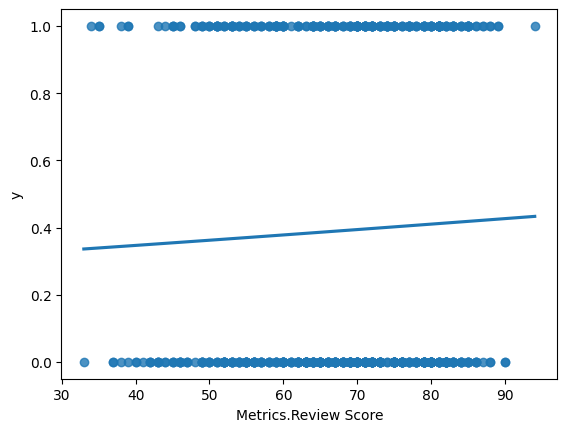

In [461]:
sns.regplot(data=df_copy, x="Metrics.Review Score", y="y",ci=False, logistic=True)
plt.show()

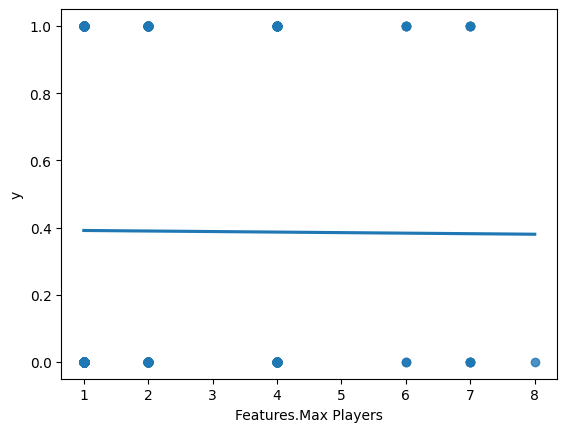

In [462]:
sns.regplot(data=df_copy, x="Features.Max Players", y="y",ci=False, logistic=True)
plt.show()

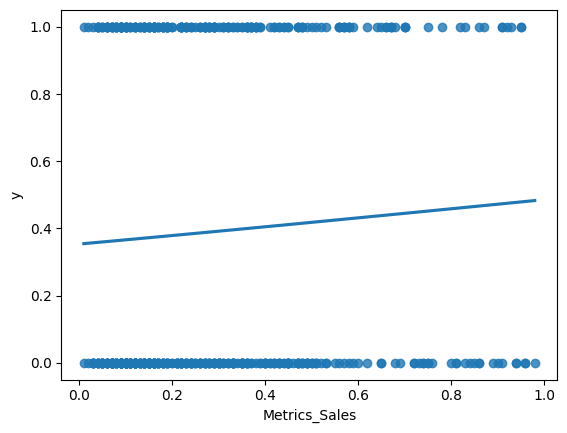

In [463]:
sns.regplot(data=df_copy, x="Metrics_Sales", y="y",ci=False, logistic=True)
plt.show()

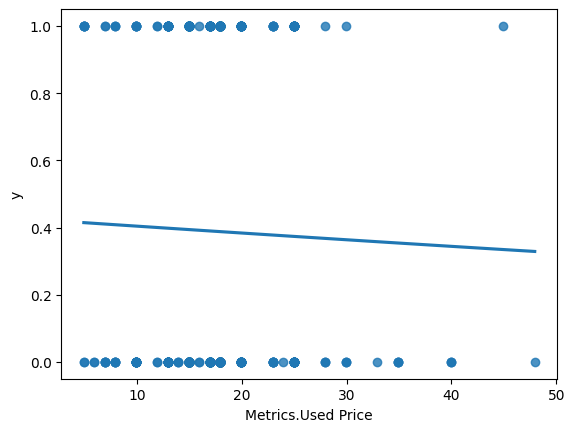

In [464]:
sns.regplot(data=df_copy, x="Metrics.Used Price", y="y",ci=False, logistic=True)
plt.show()

<AxesSubplot: xlabel='Release_Console'>

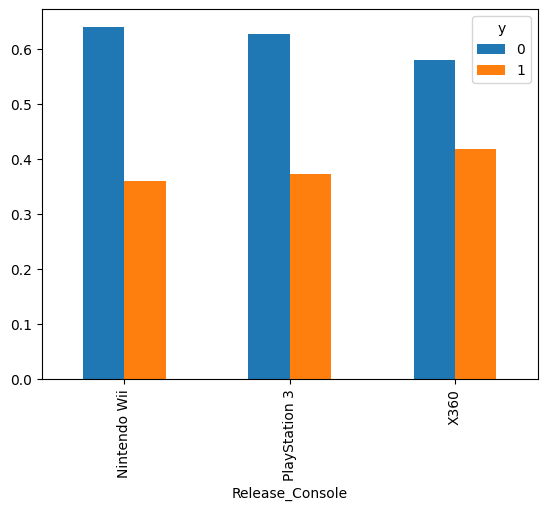

In [465]:
tab = pd.crosstab(df_copy['Release_Console'], df_copy['y'], normalize = 'index')
tab.plot.bar()

We can also see that release_console has a relationship with the repsonse variable given that the ratings change depending on the type of console and X360 in general has a significantly higher rating than PS3 and Nintendo Wii

Relationships between explanatory pairs

max players and review score - lmplot

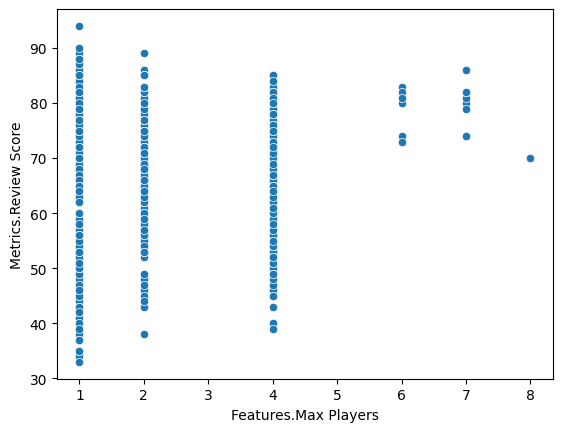

In [466]:
sns.scatterplot(x='Features.Max Players',y='Metrics.Review Score',data=df_copy)
plt.show()

max player and sales - scatterplot

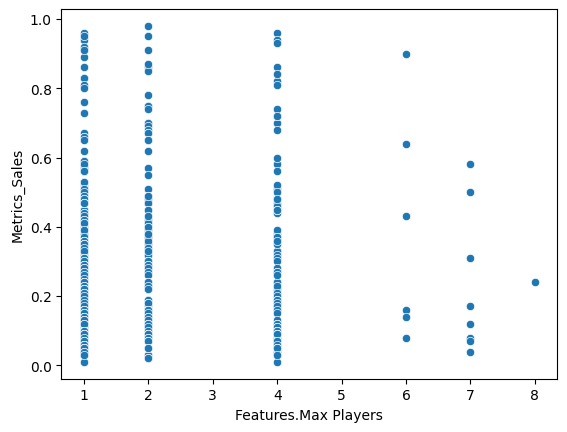

In [467]:
sns.scatterplot(x='Features.Max Players',y='Metrics_Sales',data=df_copy)
plt.show()

max player and used price - lmplot

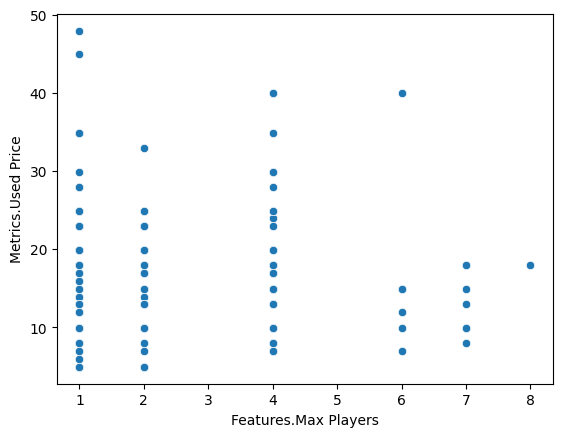

In [468]:
sns.scatterplot(x='Features.Max Players',y='Metrics.Used Price',data=df_copy)
plt.show()

max player and console - boxplot

<AxesSubplot: xlabel='Features.Max Players', ylabel='Release_Console'>

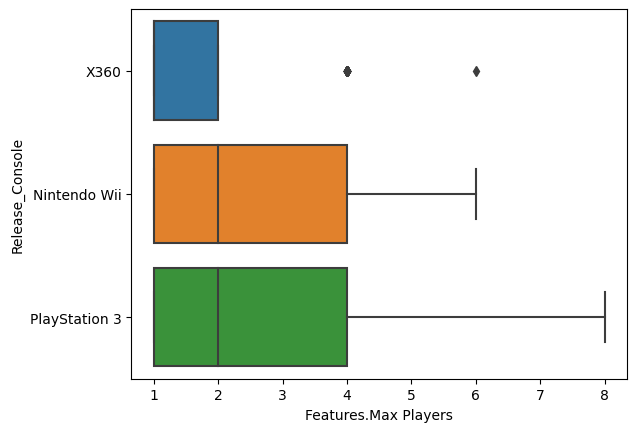

In [469]:
sns.boxplot(data=df_copy, x="Features.Max Players", y="Release_Console")


Relationships between Explanatory Variable Pairs

Given the graphs above, there is not really any explanatory variable pairs with a strong relationship with each other. However, features max players and release console definitely has a stronger relationship.
 

review score and sales - lmplot

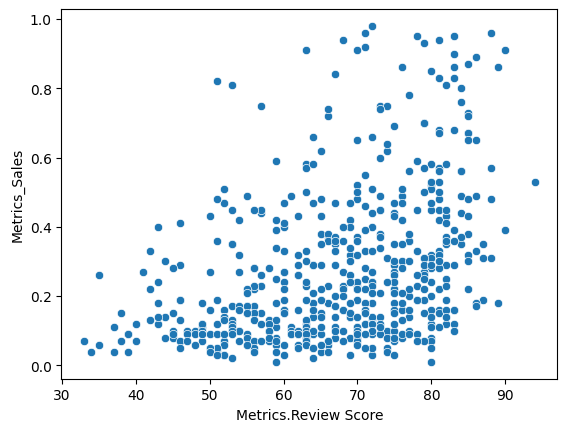

In [470]:
sns.scatterplot(x='Metrics.Review Score',y='Metrics_Sales',data=df_copy)
plt.show()

review score and used price - lmplot

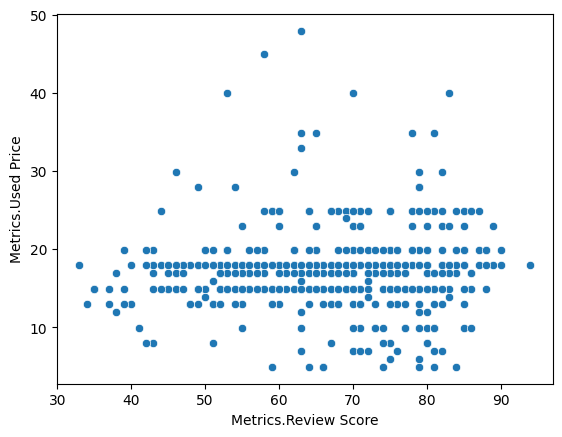

In [471]:
sns.scatterplot(x='Metrics.Review Score',y='Metrics.Used Price',data=df_copy)
plt.show()

review score and console - boxplot

<AxesSubplot: xlabel='Metrics.Review Score', ylabel='Release_Console'>

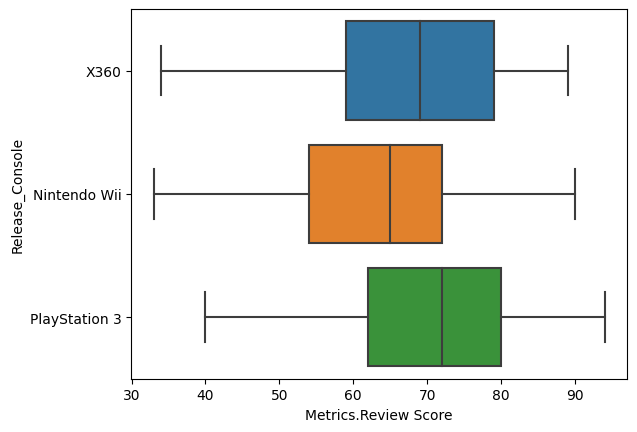

In [472]:
sns.boxplot(data=df_copy, x="Metrics.Review Score", y="Release_Console")

sales and used price - lmplot

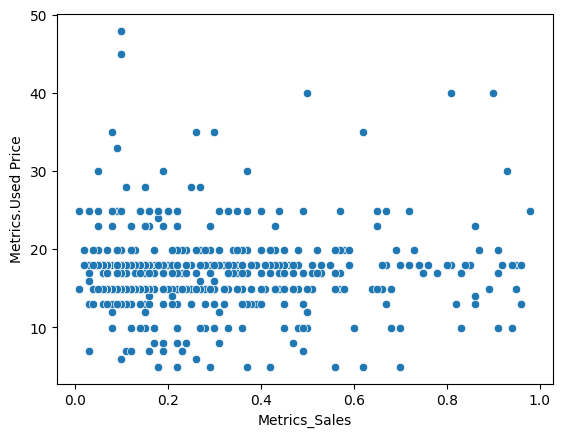

In [473]:
sns.scatterplot(x='Metrics_Sales',y='Metrics.Used Price',data=df_copy)
plt.show()

sales and console - boxplot

<AxesSubplot: xlabel='Metrics_Sales', ylabel='Release_Console'>

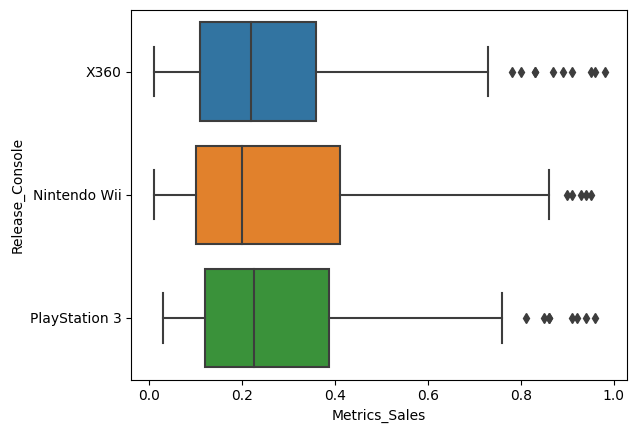

In [474]:
sns.boxplot(data=df_copy, x="Metrics_Sales", y="Release_Console")

used price and console - boxplot

<AxesSubplot: xlabel='Metrics.Used Price', ylabel='Release_Console'>

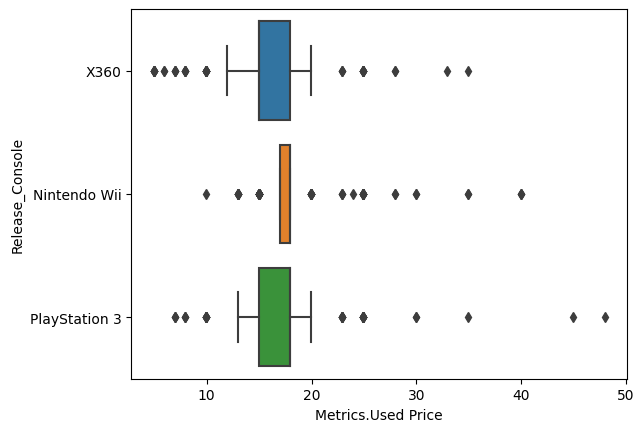

In [475]:
sns.boxplot(data=df_copy, x="Metrics.Used Price", y="Release_Console")

Interaction Effects

**Numerical - Categorical Explanatory Variable Pairs**<br>
Numerical Variables: Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price<br>
Categorical Variables: Release.Console<br>
Response Variable: Release.Rating(y)

Features.Max Players & Release.Console

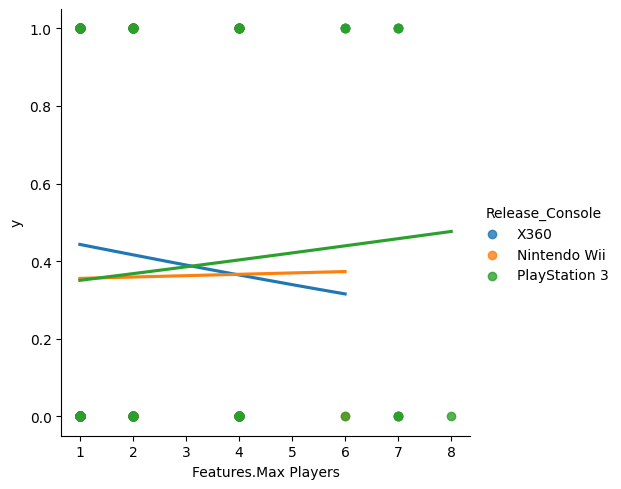

In [476]:
sns.lmplot(x='Features.Max Players',y='y',hue='Release_Console',data=df_copy,logistic=True,ci=False)
plt.show()

There is a clear difference that as the more players allowed for the game and with the console PS4 there is a signifcant increase in ratings.

Metrics.Review Score & Release.Console

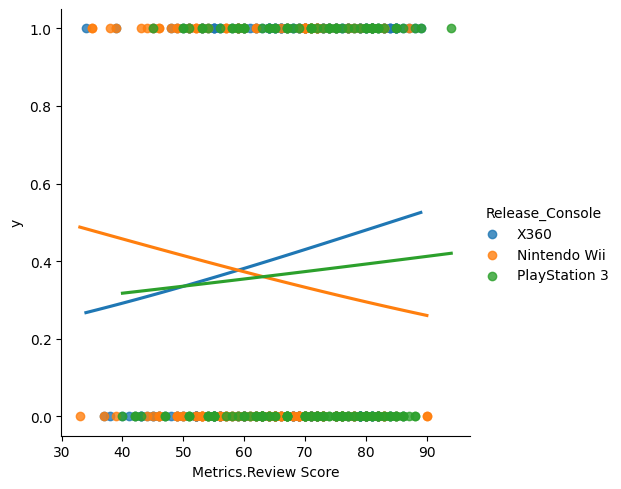

In [477]:
sns.lmplot(x='Metrics.Review Score',y='y',hue='Release_Console',data=df_copy,logistic=True,ci=False)
plt.show()

In contrast, the metrics review score and the ratings increase when the console is X360 and Nintendo Wii which means that normally the review score would be higher for the X360 and Nintendo Wii consoles and given the stronger relaitonship between the metrics review score and the ratings we can see how it also affects our response variable

Metrics.Sales & Release.Console

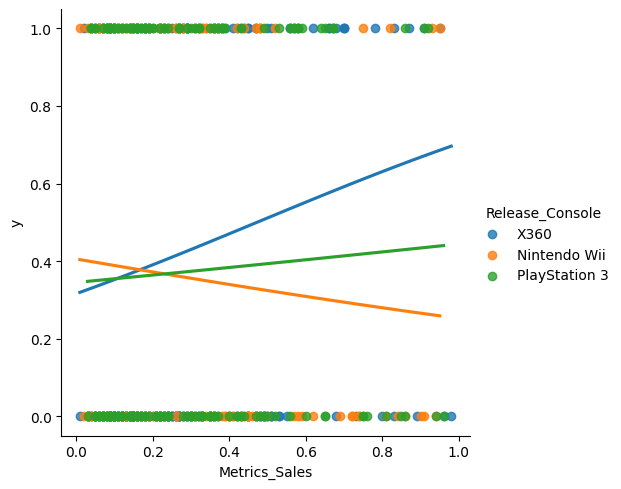

In [478]:
sns.lmplot(x='Metrics_Sales',y='y',hue='Release_Console',data=df_copy,logistic=True,ci=False)
plt.show()

The sales is significantly higher with X360 than the other 2 and even for PS3 there is a decreasing rating as the sales increase for Nintendo Wii. This tells me that normally the sales for X360 and PS3 is higher than since metrics sales and y have a stronger relationship it is also affected by the console

Metrics.Used Price & Release.Console

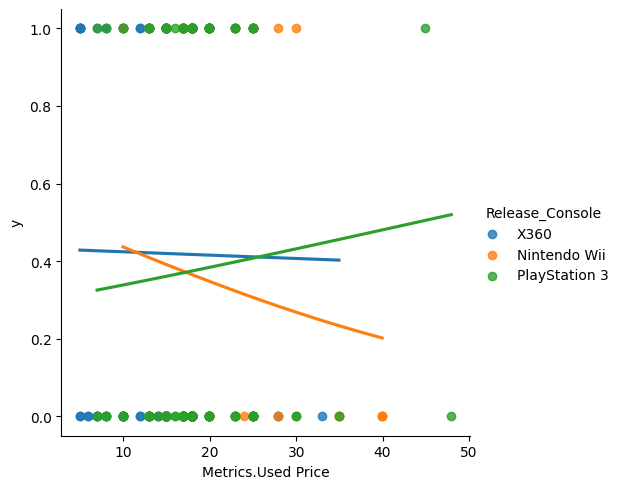

In [479]:
sns.lmplot(x='Metrics.Used Price',y='y',hue='Release_Console',data=df_copy,logistic=True,ci=False)
plt.show()

In contrast, PS3 has a higher price than the other 2 consoles which also correlated with an increase in ratings. This is interesting because the sales for Nintendo and X360 is higher but the price of the PS3 is signifcantly higher which leads to an increasing trend in rating for this console as its price increases but the opposite effect for the other 2 consoles.

## 5. Model Data Preprocessing

To start of, we make a copy of the dataframe as to make changes without affecting the original dataframe. 

In [480]:
df_copy = df_copy.rename(columns={'Features.Max Players':'Features_Max_Players','Metrics.Review Score':'Metrics_Review_Score','Metrics.Used Price':'Metrics_Used_Price','Release_Console_Nintendo Wii':'Release_Console_Nintendo_Wii','Release_Console_Playstation 3':'Release_Console_PlayStation_3'})
df_copy

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,Release_Console,Release_Rating,y
36,2,83,0.95,17.95,X360,E,1
43,4,79,0.70,17.95,X360,E,1
47,2,74,0.62,4.95,X360,E,1
56,4,85,0.38,17.95,X360,E,1
61,4,77,0.36,16.95,X360,E,1
...,...,...,...,...,...,...,...
1201,1,50,0.04,19.95,Nintendo Wii,T,0
1202,1,56,0.04,17.95,X360,T,0
1203,4,52,0.03,16.95,X360,M,0
1209,1,51,0.03,15.95,PlayStation 3,M,0


In [481]:
df_dummies = pd.get_dummies(df_copy)
df_dummies

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y,Release_Console_Nintendo Wii,Release_Console_PlayStation 3,Release_Console_X360,Release_Rating_E,Release_Rating_M,Release_Rating_T
36,2,83,0.95,17.95,1,0,0,1,1,0,0
43,4,79,0.70,17.95,1,0,0,1,1,0,0
47,2,74,0.62,4.95,1,0,0,1,1,0,0
56,4,85,0.38,17.95,1,0,0,1,1,0,0
61,4,77,0.36,16.95,1,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1201,1,50,0.04,19.95,0,1,0,0,0,0,1
1202,1,56,0.04,17.95,0,0,0,1,0,0,1
1203,4,52,0.03,16.95,0,0,0,1,0,1,0
1209,1,51,0.03,15.95,0,0,1,0,0,1,0


Next, we want to make dummy variables variables so that our categprical variables turn into 0/1 indicator variables.

In [482]:
df_dummies_copy = df_dummies[['Features_Max_Players','Metrics_Review_Score','Metrics_Sales','Metrics_Used_Price','y','Release_Console_Nintendo Wii','Release_Console_PlayStation 3','Release_Console_X360']]
df_dummies_copy

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y,Release_Console_Nintendo Wii,Release_Console_PlayStation 3,Release_Console_X360
36,2,83,0.95,17.95,1,0,0,1
43,4,79,0.70,17.95,1,0,0,1
47,2,74,0.62,4.95,1,0,0,1
56,4,85,0.38,17.95,1,0,0,1
61,4,77,0.36,16.95,1,0,0,1
...,...,...,...,...,...,...,...,...
1201,1,50,0.04,19.95,0,1,0,0
1202,1,56,0.04,17.95,0,0,0,1
1203,4,52,0.03,16.95,0,0,0,1
1209,1,51,0.03,15.95,0,0,1,0


In [483]:
df_dummies_copy = df_dummies_copy.rename(columns={'Release_Console_Nintendo Wii':'Release_Console_Nintendo_Wii','Release_Console_PlayStation 3':'Release_Console_PlayStation_3'})
df_dummies_copy

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y,Release_Console_Nintendo_Wii,Release_Console_PlayStation_3,Release_Console_X360
36,2,83,0.95,17.95,1,0,0,1
43,4,79,0.70,17.95,1,0,0,1
47,2,74,0.62,4.95,1,0,0,1
56,4,85,0.38,17.95,1,0,0,1
61,4,77,0.36,16.95,1,0,0,1
...,...,...,...,...,...,...,...,...
1201,1,50,0.04,19.95,0,1,0,0
1202,1,56,0.04,17.95,0,0,0,1
1203,4,52,0.03,16.95,0,0,0,1
1209,1,51,0.03,15.95,0,0,1,0


Next, we make a training and test dataframe with 80% of the values in the training dataframe and setting a random state to 101. 

In [484]:
from sklearn.model_selection import train_test_split
(df_train, df_test) = train_test_split(df_dummies_copy,test_size=0.20,random_state = 101)
df_test

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y,Release_Console_Nintendo_Wii,Release_Console_PlayStation_3,Release_Console_X360
783,7,74,0.04,17.95,1,0,1,0
187,2,83,0.86,13.95,0,0,1,0
687,1,55,0.15,14.95,1,0,0,1
316,4,80,0.12,14.95,0,0,0,1
919,1,84,0.56,19.95,0,0,1,0
...,...,...,...,...,...,...,...,...
1074,2,56,0.13,14.95,0,0,0,1
574,4,74,0.31,17.95,1,1,0,0
980,1,79,0.31,17.95,1,0,0,1
1131,1,76,0.09,17.95,0,1,0,0


Net, since we will be using a Logistic regression model, we need to make a Features matrix and Target array for both the training and test dataframes. 

In [485]:
x_train=df_train.drop(['y'], axis=1)
x_train

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,Release_Console_Nintendo_Wii,Release_Console_PlayStation_3,Release_Console_X360
260,1,71,0.25,14.95,0,0,1
948,1,85,0.43,19.95,0,1,0
965,1,68,0.36,19.95,0,0,1
1112,1,67,0.10,12.95,0,0,1
1120,4,78,0.09,19.95,0,0,1
...,...,...,...,...,...,...,...
796,1,37,0.04,14.95,1,0,0
967,1,87,0.35,19.95,0,0,1
301,2,69,0.14,14.95,0,0,1
897,4,73,0.74,17.95,1,0,0


In [486]:
x_train.dtypes

Features_Max_Players               int64
Metrics_Review_Score               int64
Metrics_Sales                    float64
Metrics_Used_Price               float64
Release_Console_Nintendo_Wii       uint8
Release_Console_PlayStation_3      uint8
Release_Console_X360               uint8
dtype: object

In [487]:
y_train=df_train['y']
y_train

260     0
948     0
965     1
1112    1
1120    0
       ..
796     0
967     1
301     0
897     0
1142    0
Name: y, Length: 441, dtype: int64

In [488]:
x_test=df_test.drop(['y'], axis=1)
x_test

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,Release_Console_Nintendo_Wii,Release_Console_PlayStation_3,Release_Console_X360
783,7,74,0.04,17.95,0,1,0
187,2,83,0.86,13.95,0,1,0
687,1,55,0.15,14.95,0,0,1
316,4,80,0.12,14.95,0,0,1
919,1,84,0.56,19.95,0,1,0
...,...,...,...,...,...,...,...
1074,2,56,0.13,14.95,0,0,1
574,4,74,0.31,17.95,1,0,0
980,1,79,0.31,17.95,0,0,1
1131,1,76,0.09,17.95,1,0,0


In [489]:
y_test=df_test['y']
y_test

783     1
187     0
687     1
316     0
919     0
       ..
1074    0
574     1
980     1
1131    0
277     0
Name: y, Length: 111, dtype: int64

Since our secondary research goal which focuses on model interpretability, our next step should scale our numerical explanatory variables.

In [490]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
svars=scaler.fit_transform(df_train[['Features_Max_Players','Metrics_Review_Score','Metrics_Sales','Metrics_Used_Price']])
df_train[['Features_Max_Players','Metrics_Review_Score','Metrics_Sales','Metrics_Used_Price']] = svars
df_train.head()

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y,Release_Console_Nintendo_Wii,Release_Console_PlayStation_3,Release_Console_X360
260,-0.744094,0.333210,-0.130110,-0.416386,0,0,0,1
948,-0.744094,1.474850,0.710941,0.542999,0,0,1,0
965,-0.744094,0.088572,0.383866,0.542999,1,0,0,1
1112,-0.744094,0.007027,-0.830985,-0.800140,1,0,0,1
1120,1.433862,0.904030,-0.877710,0.542999,0,0,0,1


In [491]:
svars_test=scaler.transform(df_test[['Features_Max_Players','Metrics_Review_Score','Metrics_Sales','Metrics_Used_Price']])
df_test[['Features_Max_Players','Metrics_Review_Score','Metrics_Sales','Metrics_Used_Price']] = svars_test
df_test.head()

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y,Release_Console_Nintendo_Wii,Release_Console_PlayStation_3,Release_Console_X360
783,3.611817,0.577847,-1.111335,0.159245,1,0,1,0
187,-0.018108,1.311758,2.720117,-0.608263,0,0,1,0
687,-0.744094,-0.971522,-0.597360,-0.416386,1,0,0,1
316,1.433862,1.067121,-0.737535,-0.416386,0,0,0,1
919,-0.744094,1.393304,1.318366,0.542999,0,0,1,0


## 6. Feature Selection with k-Fold Cross-Validation

OPTION A: Backwards Elimination with Cross-Validation
Perform a backwards elimination algorithm that tries to select the logistic regression model with the highest average test AUC in the k=5 fold cross-validation.

In [492]:
import statsmodels.formula.api as smf
fullmodel = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Sales+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360', data=df_train).fit()
fullmodel.summary()

Optimization terminated successfully.
         Current function value: 0.665477
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  441
Model:                          Logit   Df Residuals:                      434
Method:                           MLE   Df Model:                            6
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                0.006398
Time:                        02:43:07   Log-Likelihood:                -293.48
converged:                       True   LL-Null:                       -295.36
Covariance Type:            nonrobust   LLR p-value:                    0.7065
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3573   7.61e+06   -4.7e-08      1.000   -1.49e+07    1.49e+07
Features_Max_Players             -0.0116      0.100     -0.116      0.908      -0.207       0.184
Metrics_Review_Score              0.0157      0.112      0.140      0.889      -0.204       0.235
Metrics_Sales                     0.0807      0.109      0.740      0.459      -0.133       0.294
Metrics_Used_Price               -0.0352      0.102     -0.345      0.730      -0.235       0.165
Release_Console_Nintendo_Wii     -0.3111   7.61e+06  -4.09e-08      1.000   -1.49e+07    1.49e+07
Release_Console_PlayStation_3    -0.1222   7.61e+06  -1.61e-08      1.000   -1.49e+07    1.49e+07
Release_Console_X360              0.0760   7.61e+06   9.99e-09      1.000   -1.49e+07    1.49e+07
=================================================================================================
"""

In [493]:
phat_test = fullmodel.predict(df_test)
phat_test.head()

783    0.352613
187    0.445737
687    0.420328
316    0.419198
919    0.410514
dtype: float64

In [494]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_true=df_test['y'],
y_score=phat_test)

In [495]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

0.5134575569358177

In [496]:
def plot_roc(fpr, tpr, auc, lw=2):
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
    label='ROC curve (area = '+str(round(auc,3))+')')
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

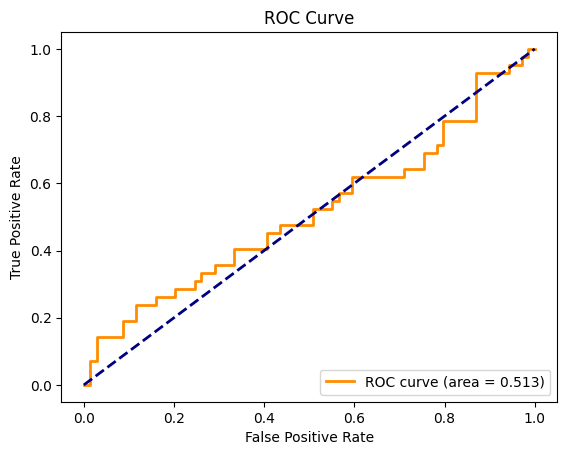

In [497]:
plot_roc(fprs, tprs, auc)

Backwards Elimination Algorithm

Iteration 1.1 - Current model Test AUC

In [498]:
#1. Fit the logistic regression model
current_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Sales+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = current_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.665477
         Iterations 4


0.5134575569358177

1.2 - Deletes Features_Max_Players

In [499]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Metrics_Review_Score+Metrics_Sales+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc


Optimization terminated successfully.
         Current function value: 0.665492
         Iterations 6


0.5162180814354728

1.2 - Deletes Metrics_Review_Score

In [500]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Sales+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.665499
         Iterations 30


0.5108695652173912

1.2 - Deletes Metrics_Sales

In [501]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666096
         Iterations 13


0.4932712215320911

1.2 - Deletes Metrics_Used_Price

In [502]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Sales+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.665612
         Iterations 4


0.5220841959972394

1.2 - Deletes Release_Console_Nintendo_Wii


In [503]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Sales+Metrics_Used_Price+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.665477
         Iterations 4


0.5134575569358177

1.2 - Deletes Release_Console_PlayStation_3


In [504]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Sales+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.665477
         Iterations 4


0.5134575569358177

1.2 - Deletes Release_Console_X360

In [505]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Sales+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.665477
         Iterations 4


0.5134575569358177

Iteration 2.1. Current Model Test AUC (Deletes Metrics_Sales)

Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [506]:
#1. Fit the logistic regression model
current_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = current_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666096
         Iterations 13


0.4932712215320911

2.2 - Deletes Features_Max_Players

Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [507]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666118
         Iterations 4


0.4920634920634921

2.2 - Deletes Metrics_Review_Score

Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [508]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

         Current function value: 0.666411
         Iterations: 35


0.4635955831608006

2.2 - Deletes Metrics_Used_Price

Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [509]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666230
         Iterations 6


0.49723947550034514

2.2 - Deletes Release_Console_Nintendo_Wii

Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [510]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666096
         Iterations 4


0.4932712215320911

2.2 - Deletes Release_Console_PlayStation_3

Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [511]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666096
         Iterations 4


0.4932712215320911

2.2 - Deletes Release_Console_X360

Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [512]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Metrics_Used_Price+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666096
         Iterations 4


0.4932712215320911

Iteration 3.1. Current Model Test AUC (Deletes Metrics_Used_Price)

Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [513]:
#1. Fit the logistic regression model
current_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = current_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666230
         Iterations 6


0.49723947550034514

3.2 Deletes Features_Max_Players

Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [514]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 7


0.49706694271911667

3.2 Deletes Metrics_Review_Score

Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [515]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666529
         Iterations 10


0.48309178743961356

3.2 Deletes Release_Console_Nintendo_Wii

Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [516]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666230
         Iterations 4


0.49723947550034514

3.2 Deletes Release_Console_PlayStation_3

Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [517]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666230
         Iterations 4


0.49723947550034514

3.2 Deletes Release_Console_X360

Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [518]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666230
         Iterations 4


0.49723947550034514

Iteration 4.1. Current Model Test AUC (Deletes Metrics_Used_Price)

Features_Max_Players+Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [519]:
#1. Fit the logistic regression model
current_mod = smf.logit(formula='y~Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = current_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 7


0.49706694271911667

4.2 Deletes Metrics_Review_Score

Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [520]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

         Current function value: 0.666533
         Iterations: 35


0.47342995169082125

4.2 Deletes Release_Console_Nintendo_Wii

Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [521]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Metrics_Review_Score+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 4


0.49706694271911667

4.2 Deletes Release_Console_PlayStation_3

Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [522]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 4


0.49706694271911667

4.2 Deletes Release_Console_X360

Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360

In [523]:
#1. Fit the logistic regression model
test_mod = smf.logit(formula='y~Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = test_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 4


0.49706694271911667

## 7. Best Model Discussion

First, we fit the best model from #6 with your training features matrix and target array.

In [547]:
#1. Fit the logistic regression model
best_mod = smf.logit(formula='y~Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = best_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 7


0.49706694271911667

In [548]:
bestmodel = smf.logit(formula='y~Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360', data=df_train).fit()
bestmodel.summary()

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  441
Model:                          Logit   Df Residuals:                      437
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Dec 2023   Pseudo R-squ.:                0.005258
Time:                        09:17:24   Log-Likelihood:                -293.81
converged:                       True   LL-Null:                       -295.36
Covariance Type:            nonrobust   LLR p-value:                    0.3756
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -0.3577        nan        nan        nan         nan         nan
Metrics_Review_Score              0.0507      0.100      0.508      0.612      -0.145       0.246
Release_Console_Nintendo_Wii     -0.3092        nan        nan        nan         nan         nan
Release_Console_PlayStation_3    -0.1337        nan        nan        nan         nan         nan
Release_Console_X360              0.0853        nan        nan        nan         nan         nan
=================================================================================================
"""

Below is the equation for the best logistic regression equation that we selected in #6.

Logit(Probability of 'Release Rating') = -0.3577 + 0.0507(Metrics_Review_Score)  -0.3092(Release_Console_Nintendo_Wii) -0.1337(Release_Console_PlayStation_3) + 0.0853(Release_Console_X360)

In [550]:
bestmodel_columns = df_train[['Metrics_Review_Score','Release_Console_Nintendo_Wii','Release_Console_PlayStation_3','Release_Console_X360']]
bestmodel_columns.corr()

,Metrics_Review_Score,Release_Console_Nintendo_Wii,Release_Console_PlayStation_3,Release_Console_X360
Metrics_Review_Score,1.000000,-0.155985,0.152436,-0.004645
Release_Console_Nintendo_Wii,-0.155985,1.000000,-0.391942,-0.515410
Release_Console_PlayStation_3,0.152436,-0.391942,1.000000,-0.586368
Release_Console_X360,-0.004645,-0.515410,-0.586368,1.000000


Above, we check the correlation between our numerical explanatory variables to see if there were issues with multicollinearity. As you can see, none of the numerical explanatory variables have a correlation above 0.7, indicating that multicollinearity was not an issue in our analysis. 
After evaluating the equation that was generated, we can determine that Release_Console_Nintendo_Wii was the strongest, followed by Release_Console_PlayStation_3 when it comes to predicting the response variable because they have the highest slope magnitudes. 
Features max players and sales may have been subject to overfitting because earlier they had weak associationg with the response variable. 

In [551]:
#1. Fit the logistic regression model
best_mod = smf.logit(formula='y~Metrics_Review_Score+Release_Console_Nintendo_Wii+Release_Console_PlayStation_3+Release_Console_X360',
data=df_train).fit()
#2. Calculate the test predictive probabilities for this model
phat_test = best_mod.predict(df_test)
#3. Calculate the AUC of the test data ROC curve
auc = roc_auc_score(y_true=df_test['y'],
y_score=phat_test)
auc

Optimization terminated successfully.
         Current function value: 0.666240
         Iterations 7


0.49706694271911667

The AUC of 0.497 tells us that the logistic regression model is able to distinguish between positive and negative cases better than chance. However, the AUC is relatively low, which means that the model is not very good at distinguishing between the two classes.

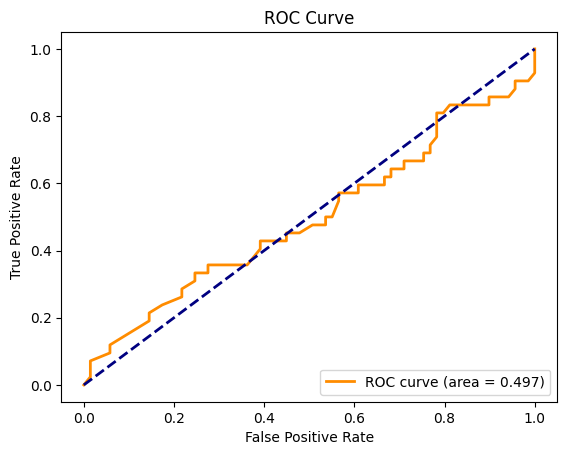

In [552]:
df_test['predictive_prob'] = phat_test

fprs,tprs,thresholds = roc_curve(y_true=df_test['y'],y_score=df_test['predictive_prob'])
auc = roc_auc_score(y_true=df_test['y'],y_score=df_test['predictive_prob'])
plot_roc(fprs,tprs,auc)


In [553]:
fprs

array([0.        , 0.01449275, 0.01449275, 0.05797101, 0.05797101,
       0.11594203, 0.14492754, 0.14492754, 0.17391304, 0.2173913 ,
       0.2173913 , 0.24637681, 0.24637681, 0.27536232, 0.27536232,
       0.33333333, 0.36231884, 0.39130435, 0.39130435, 0.4057971 ,
       0.43478261, 0.44927536, 0.44927536, 0.47826087, 0.50724638,
       0.53623188, 0.53623188, 0.55072464, 0.56521739, 0.56521739,
       0.57971014, 0.60869565, 0.60869565, 0.66666667, 0.66666667,
       0.68115942, 0.68115942, 0.71014493, 0.71014493, 0.73913043,
       0.75362319, 0.75362319, 0.76811594, 0.76811594, 0.7826087 ,
       0.7826087 , 0.79710145, 0.8115942 , 0.86956522, 0.89855072,
       0.89855072, 0.94202899, 0.95652174, 0.95652174, 0.98550725,
       1.        , 1.        ])

In [554]:
tprs

array([0.        , 0.02380952, 0.07142857, 0.0952381 , 0.11904762,
       0.16666667, 0.19047619, 0.21428571, 0.23809524, 0.26190476,
       0.28571429, 0.30952381, 0.33333333, 0.33333333, 0.35714286,
       0.35714286, 0.35714286, 0.4047619 , 0.42857143, 0.42857143,
       0.42857143, 0.42857143, 0.45238095, 0.45238095, 0.47619048,
       0.47619048, 0.5       , 0.5       , 0.54761905, 0.57142857,
       0.57142857, 0.57142857, 0.5952381 , 0.5952381 , 0.61904762,
       0.61904762, 0.64285714, 0.64285714, 0.66666667, 0.66666667,
       0.66666667, 0.69047619, 0.69047619, 0.71428571, 0.73809524,
       0.80952381, 0.80952381, 0.83333333, 0.83333333, 0.83333333,
       0.85714286, 0.85714286, 0.88095238, 0.9047619 , 0.9047619 ,
       0.92857143, 1.        ])

In [555]:
thresholds

array([1.45177308, 0.45177308, 0.4487032 , 0.44768076, 0.44665876,
       0.44563722, 0.44461613, 0.44257536, 0.44155571, 0.44053654,
       0.43951787, 0.43849972, 0.43748208, 0.43138757, 0.42834798,
       0.42531378, 0.42127696, 0.4182562 , 0.41624575, 0.40923149,
       0.40823239, 0.40623647, 0.40128505, 0.39534041, 0.39435259,
       0.39139432, 0.39040999, 0.38844401, 0.38648166, 0.38550186,
       0.38354505, 0.37964277, 0.375756  , 0.35562173, 0.35426248,
       0.35143045, 0.35048874, 0.3495482 , 0.34860883, 0.34767064,
       0.34673362, 0.34579779, 0.34486316, 0.34392972, 0.34299749,
       0.34206646, 0.3392807 , 0.33835457, 0.33650602, 0.33374258,
       0.33007569, 0.32642936, 0.32552103, 0.324614  , 0.3228039 ,
       0.32009869, 0.31028358])

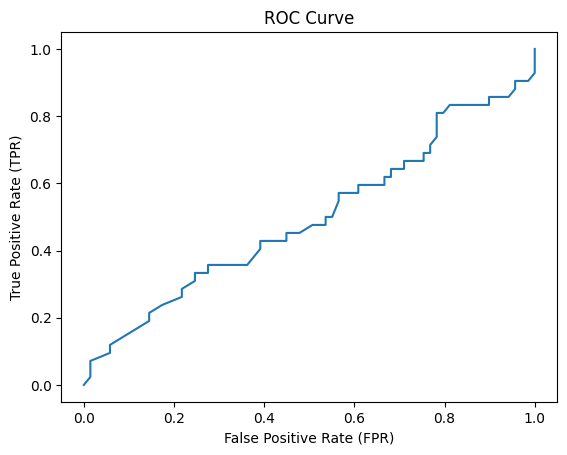

In [557]:
fprs_tprs_thresholds_df = pd.DataFrame({"Threshold": [1.45177308, 0.45177308, 0.4487032 , 0.44768076, 0.44665876,
       0.44563722, 0.44461613, 0.44257536, 0.44155571, 0.44053654,
       0.43951787, 0.43849972, 0.43748208, 0.43138757, 0.42834798,
       0.42531378, 0.42127696, 0.4182562 , 0.41624575, 0.40923149,
       0.40823239, 0.40623647, 0.40128505, 0.39534041, 0.39435259,
       0.39139432, 0.39040999, 0.38844401, 0.38648166, 0.38550186,
       0.38354505, 0.37964277, 0.375756  , 0.35562173, 0.35426248,
       0.35143045, 0.35048874, 0.3495482 , 0.34860883, 0.34767064,
       0.34673362, 0.34579779, 0.34486316, 0.34392972, 0.34299749,
       0.34206646, 0.3392807 , 0.33835457, 0.33650602, 0.33374258,
       0.33007569, 0.32642936, 0.32552103, 0.324614  , 0.3228039 ,
       0.32009869, 0.31028358],
    "TPR": [0.        , 0.02380952, 0.07142857, 0.0952381 , 0.11904762,
       0.16666667, 0.19047619, 0.21428571, 0.23809524, 0.26190476,
       0.28571429, 0.30952381, 0.33333333, 0.33333333, 0.35714286,
       0.35714286, 0.35714286, 0.4047619 , 0.42857143, 0.42857143,
       0.42857143, 0.42857143, 0.45238095, 0.45238095, 0.47619048,
       0.47619048, 0.5       , 0.5       , 0.54761905, 0.57142857,
       0.57142857, 0.57142857, 0.5952381 , 0.5952381 , 0.61904762,
       0.61904762, 0.64285714, 0.64285714, 0.66666667, 0.66666667,
       0.66666667, 0.69047619, 0.69047619, 0.71428571, 0.73809524,
       0.80952381, 0.80952381, 0.83333333, 0.83333333, 0.83333333,
       0.85714286, 0.85714286, 0.88095238, 0.9047619 , 0.9047619 ,
       0.92857143, 1.        ],
    "FPR": [0.        , 0.01449275, 0.01449275, 0.05797101, 0.05797101,
       0.11594203, 0.14492754, 0.14492754, 0.17391304, 0.2173913 ,
       0.2173913 , 0.24637681, 0.24637681, 0.27536232, 0.27536232,
       0.33333333, 0.36231884, 0.39130435, 0.39130435, 0.4057971 ,
       0.43478261, 0.44927536, 0.44927536, 0.47826087, 0.50724638,
       0.53623188, 0.53623188, 0.55072464, 0.56521739, 0.56521739,
       0.57971014, 0.60869565, 0.60869565, 0.66666667, 0.66666667,
       0.68115942, 0.68115942, 0.71014493, 0.71014493, 0.73913043,
       0.75362319, 0.75362319, 0.76811594, 0.76811594, 0.7826087 ,
       0.7826087 , 0.79710145, 0.8115942 , 0.86956522, 0.89855072,
       0.89855072, 0.94202899, 0.95652174, 0.95652174, 0.98550725,
       1.        , 1.        ]})

plt.plot(fprs_tprs_thresholds_df['FPR'], fprs_tprs_thresholds_df['TPR'])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.show()

In [559]:
fprs_tprs_thresholds_df['J'] = fprs_tprs_thresholds_df['TPR'] - fprs_tprs_thresholds_df['FPR']

best_threshold = fprs_tprs_thresholds_df[fprs_tprs_thresholds_df['J'] == fprs_tprs_thresholds_df['J'].max()]['Threshold'].values[0]

# Calculate the TPR and FPR at the best threshold
best_tpr = fprs_tprs_thresholds_df[fprs_tprs_thresholds_df['Threshold'] == best_threshold]['TPR'].values[0]
best_fpr = fprs_tprs_thresholds_df[fprs_tprs_thresholds_df['Threshold'] == best_threshold]['FPR'].values[0]

# Print the results
print(f"Best Predictive Probability Threshold: {best_threshold:.2f}")
print(f"Test FPR: {best_fpr:.2f}")
print(f"Test TPR: {best_tpr:.2f}")

Best Predictive Probability Threshold: 0.44
Test FPR: 0.25
Test TPR: 0.33


The test FPR of 0.25 means that the model incorrectly classifies 25% of the negative cases as positive. The test TPR of 0.33 means that the model correctly classifies 33% of the positive cases.

Overall, the logistic regression model is not very good at classifying the observations in this test dataset. The AUC is relatively low, and the test FPR and TPR are not very high.



## 8. Additional Analysis/Insight

I am using the k_mean to reach our third rescreh goal, which is to present the realationship of variables that we use in model.

In [562]:
numeric_columns = df_copy.select_dtypes(include=['int', 'float'])
corr_matrix = numeric_columns.corr()
corr_matrix

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y,cluster
Features_Max_Players,1.000000,0.088964,-0.000670,-0.086474,-0.004614,-0.004614
Metrics_Review_Score,0.088964,1.000000,0.402976,0.028457,0.040607,0.040607
Metrics_Sales,-0.000670,0.402976,1.000000,0.022417,0.059198,0.059198
Metrics_Used_Price,-0.086474,0.028457,0.022417,1.000000,-0.021079,-0.021079
y,-0.004614,0.040607,0.059198,-0.021079,1.000000,1.000000
cluster,-0.004614,0.040607,0.059198,-0.021079,1.000000,1.000000


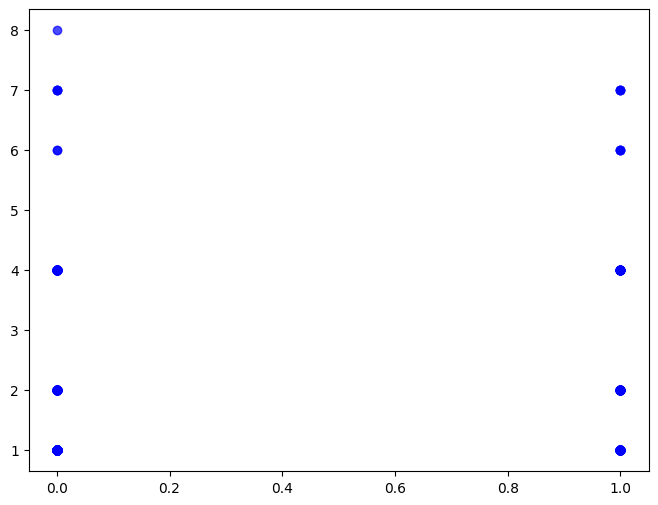

In [527]:
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['y'], df_copy['Features_Max_Players'], alpha=0.7, color='blue')
plt.show()

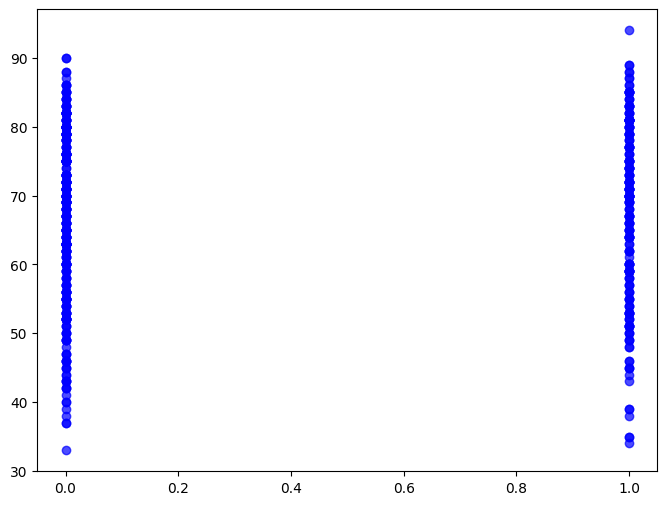

In [528]:
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['y'], df_copy['Metrics_Review_Score'], alpha=0.7, color='blue')
plt.show()

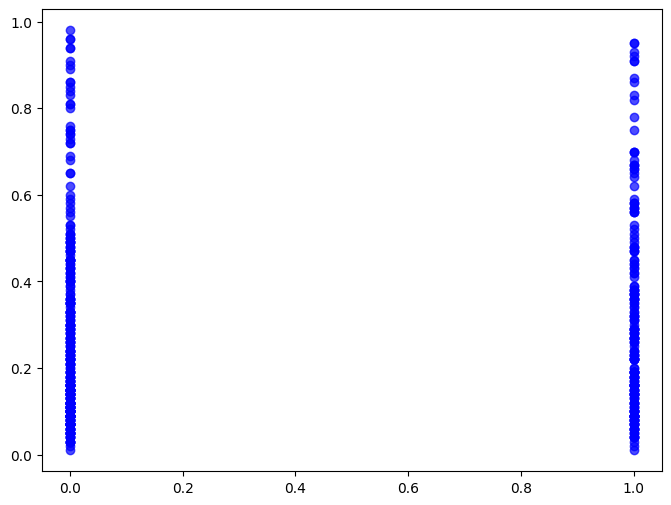

In [529]:
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['y'], df_copy['Metrics_Sales'], alpha=0.7, color='blue')
plt.show()

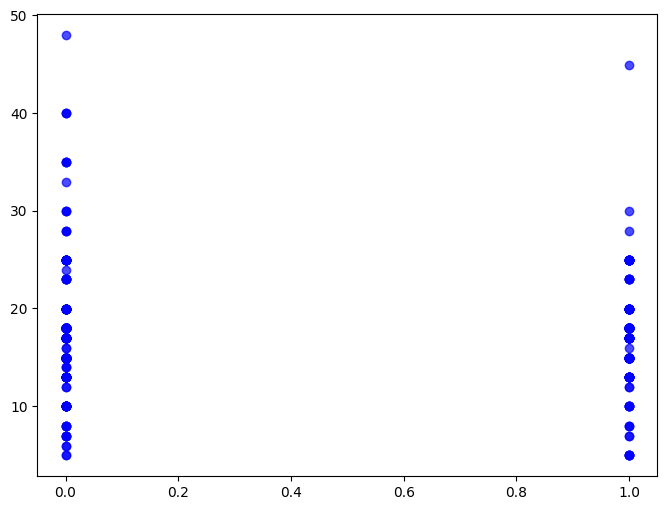

In [530]:
plt.figure(figsize=(8, 6))
plt.scatter(df_copy['y'], df_copy['Metrics_Used_Price'], alpha=0.7, color='blue')
plt.show()

In [531]:
from sklearn.cluster import KMeans
kmeans = KMeans(2)

In [532]:
numeric_columns = ['Features_Max_Players','Metrics_Review_Score','Metrics_Sales','Metrics_Used_Price','y']
numeric_columns

['Features_Max_Players',
 'Metrics_Review_Score',
 'Metrics_Sales',
 'Metrics_Used_Price',
 'y']

In [533]:
for column in numeric_columns:
    df_copy[column] = df_copy[column] / df_copy[column].abs().max()
df_copy[numeric_columns]

,Features_Max_Players,Metrics_Review_Score,Metrics_Sales,Metrics_Used_Price,y
36,0.250,0.882979,0.969388,0.374348,1.0
43,0.500,0.840426,0.714286,0.374348,1.0
47,0.250,0.787234,0.632653,0.103233,1.0
56,0.500,0.904255,0.387755,0.374348,1.0
61,0.500,0.819149,0.367347,0.353493,1.0
...,...,...,...,...,...
1201,0.125,0.531915,0.040816,0.416058,0.0
1202,0.125,0.595745,0.040816,0.374348,0.0
1203,0.500,0.553191,0.030612,0.353493,0.0
1209,0.125,0.542553,0.030612,0.332638,0.0


In [534]:
kmeans.fit(df_copy[numeric_columns])

KMeans(n_clusters=2)

In [535]:
kmeans.cluster_centers_

array([[2.60385757e-01, 7.09893301e-01, 2.75934113e-01, 3.59434129e-01,
        6.66133815e-16],
       [2.58720930e-01, 7.20880752e-01, 3.03132416e-01, 3.54851226e-01,
        1.00000000e+00]])

In [536]:
numeric_columns

['Features_Max_Players',
 'Metrics_Review_Score',
 'Metrics_Sales',
 'Metrics_Used_Price',
 'y']

In [537]:
df_copy['cluster'] = kmeans.predict(df_copy[numeric_columns])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1080: PendingDeprecationWarning: The get_cmap function will be deprecated in a future version. Use ``matplotlib.colormaps[name]`` instead.
  cmap = self.plt.cm.get_cmap(cmap)


<AxesSubplot: xlabel='Features_Max_Players', ylabel='Metrics_Review_Score'>

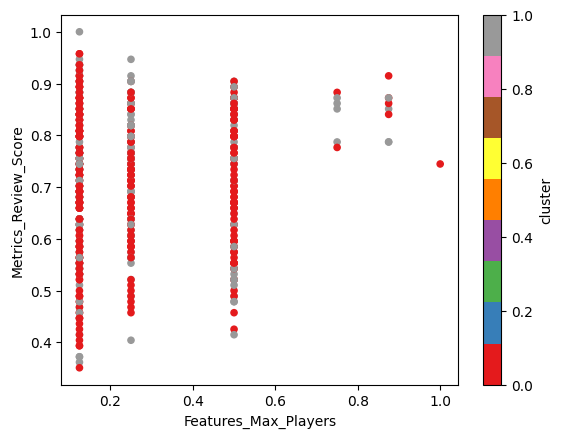

In [538]:
df_copy.plot.scatter(
    x='Features_Max_Players', 
    y='Metrics_Review_Score',
    c="cluster",
    colormap='Set1'
)

<AxesSubplot: xlabel='Metrics_Review_Score', ylabel='Metrics_Sales'>

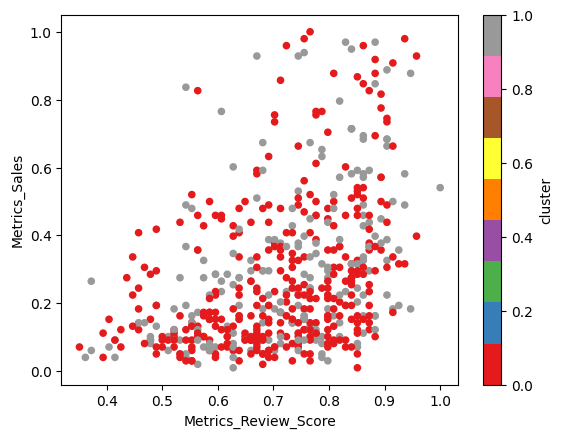

In [539]:
df_copy.plot.scatter(
    x='Metrics_Review_Score', 
    y='Metrics_Sales',
    c="cluster",
    colormap='Set1'
)

In [ ]:
df_copy.plot.scatter(
    x='Metrics.Review_Score', 
    y='Metrics.Used_Price',
    c="cluster",
    colormap='Set1'
)

<AxesSubplot: xlabel='Metrics_Used_Price', ylabel='Features_Max_Players'>

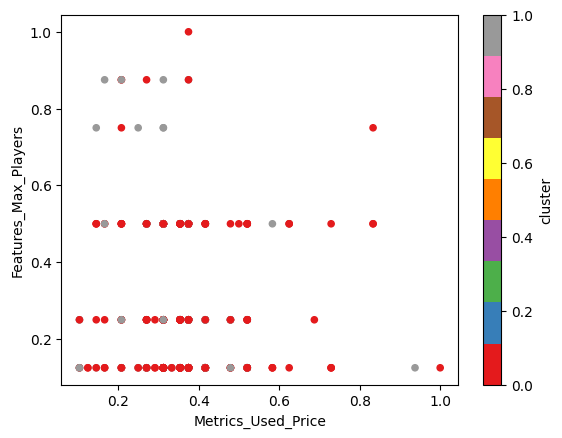

In [540]:
df_copy.plot.scatter(
    x='Metrics_Used_Price', 
    y='Features_Max_Players',
    c="cluster",
    colormap='Set1'
)

<AxesSubplot: xlabel='Metrics_Used_Price', ylabel='Metrics_Sales'>

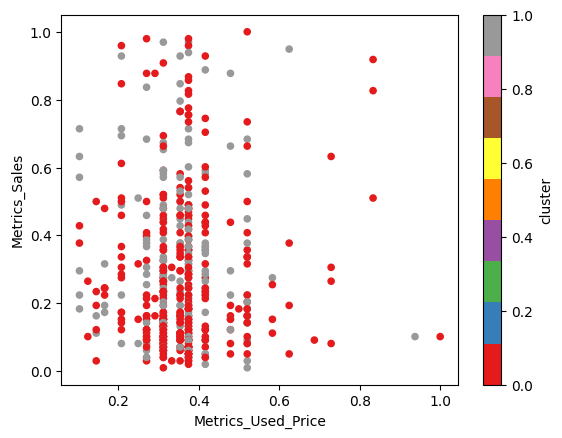

In [543]:
df_copy.plot.scatter(
    x='Metrics_Used_Price', 
    y='Metrics_Sales',
    c="cluster",
    colormap='Set1'
)

<AxesSubplot: xlabel='Features_Max_Players', ylabel='Metrics_Sales'>

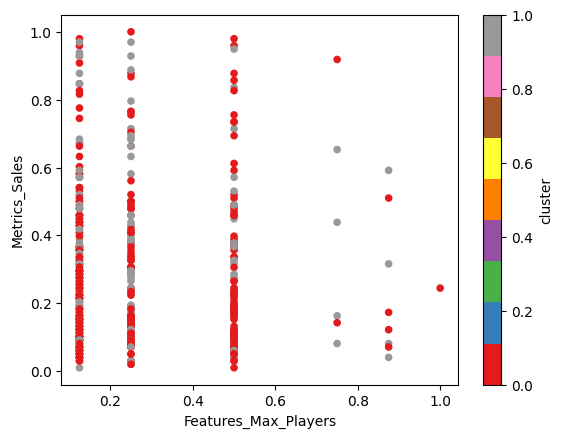

In [541]:
df_copy.plot.scatter(
    x='Features_Max_Players', 
    y='Metrics_Sales',
    c="cluster",
    colormap='Set1'
)

what we doing above is to use K_mean to draw graph that show the realationship of variables that we use in model,we must normalize the numeric data.In order to normalize the data, we can divide each numeric column by the maximum value of the column and then make sure all values are now in the same range. And then we devide our model into two custer,and use `kmeans` model and the `numeric_columns`, to predict` the centroid for each row and store that prediction in a new column in `df_copy` called `cluster.

## 9. Conclusion



release ratings using a variety of explanatory variables. Associations Now and Affogata showed that ratings define the target audience and shape the game's market position, which inspired us. We thoroughly evaluated a dataset to determine how video game elements affect release ratings.

Our analysis covered the dataset's origins, observations, and collection procedure. The dataset's comprehensiveness and impact on our predictive modeling were thoroughly assessed. We prioritized accurate forecasts and understanding variable dynamics. This dual approach allowed us to create a model that predicts release ratings with good accuracy and provides useful insights into how video game characteristics affect these ratings.

Overall, our experiment shows how data science may provide actionable game insights. Game makers can foresee and analyze rating criteria to guide their marketing and development efforts.


Recommendation
* I would recommend the use of our best predictive model with caution. While the model exhibits a reasonable average test AUC, suggesting its potential to predict game release ratings, its practicality depends on the specific goals of the game developers mentioned in our motivation. It's important to consider that the model's performance might vary based on the dataset's characteristics and its generalizability to real-world scenarios. Further evaluation and refinement may be necessary to ensure its effectiveness in aiding game developers' decision-making processes.

 
3
Shortcomings/Caveats
* Our project was complete, yet it had several drawbacks. First, while the dataset is vast, it may miss important game rating variables. While robust, the model's predicted accuracy may overfit or not generalize to dramatically different datasets. Although we focused on quantitative data, qualitative aspects may have provided nuanced insights.
 
3
Future Work
* The dataset might be expanded to include more games and factors like player feedback and genre classifications to overcome these constraints. Test the model on different datasets and use sophisticated machine learning techniques to improve its generalizability and predictive capability. Qualitative analysis, such as player evaluations or expert opinions, may help explain game ratings. Examining temporal changes in game ratings and their influences is another intriguing avenue. This comprehensive approach would improve the predictive model and enhance our grasp of the dynamic gaming business.


 
3

## References

Batchu, Vishal, et al. "How to rate a video game? - A prediction system for video games based on multimodal information." arXiv, 29 May 2018, arXiv:1805.11372. https://arxiv.org/abs/1805.11372. DOI: 10.48550/arXiv.1805.11372.